# Data Modeling

In [3]:
# data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset from the UCI Machine Learning Repository
import ucimlrepo
from ucimlrepo import fetch_ucirepo

# preprocessing and modeling tools
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer

# resampling techniques
from imblearn.over_sampling import SMOTE, SVMSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# ensemble classifiers
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier, EasyEnsembleClassifier, BalancedRandomForestClassifier

# feature selection and evaluation metrics
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import f1_score, balanced_accuracy_score, confusion_matrix, classification_report

# suppress warning messages for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [4]:
# fetch dataset
edu_dataset = fetch_ucirepo(id=697)

# extract features and targets
X = edu_dataset.data.features
y = edu_dataset.data.targets

# combining features and targets into a df
df = pd.concat([X,y], axis=1)

In [5]:
# renaming for better readibility and accessibility
df.rename(columns={
    'Marital Status': 'marital_status',
    'Application mode': 'application_mode',
    'Application order': 'application_order',
    'Course': 'course',
    'Daytime/evening attendance': 'attendance_type',
    'Previous qualification': 'prev_qualification',
    'Previous qualification (grade)': 'prev_qualification_grade',
    'Nacionality': 'nationality',
    "Mother's qualification": 'mother_qualification',
    "Father's qualification": 'father_qualification',
    "Mother's occupation": 'mother_occupation',
    "Father's occupation": 'father_occupation',
    'Admission grade': 'admission_grade',
    'Displaced': 'displaced',
    'Educational special needs': 'special_needs',
    'Debtor': 'debt',
    'Tuition fees up to date': 'fees_up_to_date',
    'Gender': 'gender',
    'Scholarship holder': 'scholarship_holder',
    'Age at enrollment': 'age_at_enrollment',
    'International': 'international',
    'Curricular units 1st sem (credited)': 'first_sem_credited',
    'Curricular units 1st sem (enrolled)': 'first_sem_enrolled',
    'Curricular units 1st sem (evaluations)': 'first_sem_evaluations',
    'Curricular units 1st sem (approved)': 'first_sem_approved',
    'Curricular units 1st sem (grade)': 'first_sem_grade',
    'Curricular units 1st sem (without evaluations)': 'first_sem_no_evaluations',
    'Curricular units 2nd sem (credited)': 'second_sem_credited',
    'Curricular units 2nd sem (enrolled)': 'second_sem_enrolled',
    'Curricular units 2nd sem (evaluations)': 'second_sem_evaluations',
    'Curricular units 2nd sem (approved)': 'second_sem_approved',
    'Curricular units 2nd sem (grade)': 'second_sem_grade',
    'Curricular units 2nd sem (without evaluations)': 'second_sem_no_evaluations',
    'Unemployment rate': 'unemployment_rate',
    'Inflation rate': 'inflation_rate',
    'GDP': 'gdp',
    'Target': 'target'
}, inplace=True)

In [6]:
# checking the columns
df.columns

Index(['marital_status', 'application_mode', 'application_order', 'course',
       'attendance_type', 'prev_qualification', 'prev_qualification_grade',
       'nationality', 'mother_qualification', 'father_qualification',
       'mother_occupation', 'father_occupation', 'admission_grade',
       'displaced', 'special_needs', 'debt', 'fees_up_to_date', 'gender',
       'scholarship_holder', 'age_at_enrollment', 'international',
       'first_sem_credited', 'first_sem_enrolled', 'first_sem_evaluations',
       'first_sem_approved', 'first_sem_grade', 'first_sem_no_evaluations',
       'second_sem_credited', 'second_sem_enrolled', 'second_sem_evaluations',
       'second_sem_approved', 'second_sem_grade', 'second_sem_no_evaluations',
       'unemployment_rate', 'inflation_rate', 'gdp', 'target'],
      dtype='object')

In [7]:
# checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   marital_status             4424 non-null   int64  
 1   application_mode           4424 non-null   int64  
 2   application_order          4424 non-null   int64  
 3   course                     4424 non-null   int64  
 4   attendance_type            4424 non-null   int64  
 5   prev_qualification         4424 non-null   int64  
 6   prev_qualification_grade   4424 non-null   float64
 7   nationality                4424 non-null   int64  
 8   mother_qualification       4424 non-null   int64  
 9   father_qualification       4424 non-null   int64  
 10  mother_occupation          4424 non-null   int64  
 11  father_occupation          4424 non-null   int64  
 12  admission_grade            4424 non-null   float64
 13  displaced                  4424 non-null   int64

In [8]:
# numerical features
num_features_s0 = [
    'prev_qualification_grade','admission_grade', 'unemployment_rate',
    'inflation_rate', 'gdp'
    ]

num_features_s1 = [
    'first_sem_credited', 'first_sem_enrolled', 'first_sem_evaluations',
    'first_sem_approved', 'first_sem_grade', 'first_sem_no_evaluations'
    ]

num_features_s2 = [
    'second_sem_credited', 'second_sem_enrolled', 'second_sem_evaluations',
    'second_sem_approved', 'second_sem_grade', 'second_sem_no_evaluations'
    ]

# categorical features
cat_features = [
    'marital_status', 'application_mode', 'course',
    'attendance_type', 'prev_qualification', 'nationality',
    'mother_qualification', 'father_qualification',
    'mother_occupation', 'father_occupation', 'displaced',
    'special_needs', 'debt', 'fees_up_to_date', 'gender',
    'scholarship_holder', 'international'
       ]

# converting categorical variables
for col in cat_features:
    df[col] = df[col].astype('category')

# application_order is discreet
df['application_order']=df['application_order'].astype('float')

# encoding target
target_mapping = {
    'Dropout': 0,
    'Graduate': 1,
    'Enrolled': 2
}

# Apply the mapping and convert to integer
df['target'] = df['target'].map(target_mapping).astype(int)

In [9]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   marital_status             4424 non-null   category
 1   application_mode           4424 non-null   category
 2   application_order          4424 non-null   float64 
 3   course                     4424 non-null   category
 4   attendance_type            4424 non-null   category
 5   prev_qualification         4424 non-null   category
 6   prev_qualification_grade   4424 non-null   float64 
 7   nationality                4424 non-null   category
 8   mother_qualification       4424 non-null   category
 9   father_qualification       4424 non-null   category
 10  mother_occupation          4424 non-null   category
 11  father_occupation          4424 non-null   category
 12  admission_grade            4424 non-null   float64 
 13  displaced                  4424 n

In [10]:
# checking mapping
df['target'].value_counts(normalize=True) * 100

,proportion
target,
1,49.932188
0,32.120253
2,17.947559


### Splitting the dataset in three datasets (S0, S1, and S3)


In [11]:

# S0: Demographic + Social-Economic + Macro-Economic + Academic (At Enrollment)

s0 = df[['marital_status', 'application_mode', 'application_order', 'course',
         'attendance_type', 'prev_qualification', 'prev_qualification_grade',
         'nationality', 'mother_qualification', 'father_qualification',
         'mother_occupation', 'father_occupation', 'admission_grade',
         'displaced', 'special_needs', 'debt', 'fees_up_to_date', 'gender',
         'scholarship_holder', 'age_at_enrollment', 'international',
         'unemployment_rate', 'inflation_rate', 'gdp', 'target']].copy()

# S1: S0 + Academic (During 1st Sem)

s1 = pd.concat([s0, df[['first_sem_credited', 'first_sem_enrolled',
                       'first_sem_evaluations', 'first_sem_approved',
                       'first_sem_grade', 'first_sem_no_evaluations']]], axis=1)

# S2: S1 + Academic (Suring 2nd Sem)

s2 = pd.concat([s1, df[['second_sem_credited', 'second_sem_enrolled',
                       'second_sem_evaluations', 'second_sem_approved',
                       'second_sem_grade', 'second_sem_no_evaluations']]], axis=1)

In [12]:
# checking distribution of target variables
s2['target'].value_counts()

,count
target,
1,2209
0,1421
2,794


## Strategies to Address Class Imbalance

Data-Level Approaches:
- SMOTE (Synthetic Minority Over-sampling Technique): Generates synthetic examples of the minority class by interpolating between existing instances.

Other Techniques to Consider:

- Random Over-Sampling: Duplicates existing minority class samples to balance the dataset.
- Random Under-Sampling: Reduces the number of majority class samples to balance the dataset.

Algorithm-Level Approaches:

- Balanced Random Forest: A variant of Random Forest that balances each bootstrap sample.
- Easy Ensemble: An ensemble method that creates multiple balanced subsets by under-sampling the majority class and trains models on each.

## **Data-level Approach**

- SMOTE + RF - s0, s1 and s2
- SVSMOTE + RF - s0, s1 and s2

Best Parameters:
{'smote__k_neighbors': 3, 'select__k': 15, 'clf__n_estimators': 100, 'clf__min_samples_leaf': 2, 'clf__max_depth': 10, 'clf__class_weight': 'balanced'}

Confusion Matrix:
[[ 96  13  33]
 [  6 191  24]
 [ 12  27  41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.68      0.75       142
           1       0.83      0.86      0.85       221
           2       0.42      0.51      0.46        80

    accuracy                           0.74       443
   macro avg       0.70      0.68      0.69       443
weighted avg       0.76      0.74      0.75       443


Train Macro F1 (CV): 0.8449 ± 0.0081
Test Balanced Accuracy: 0.6843, Test Macro F1: 0.6853


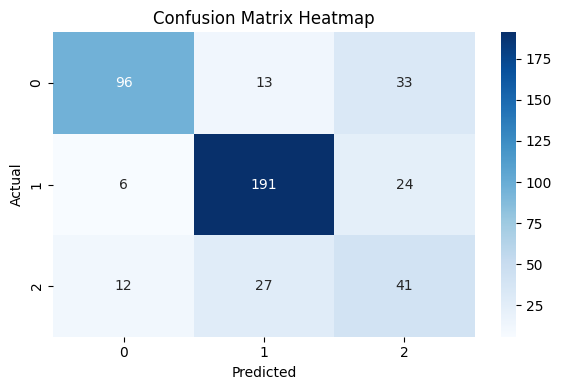


Top 15 Features by Importance:
1. num__second_sem_approved: 0.2156
2. num__first_sem_approved: 0.1436
3. num__second_sem_grade: 0.1237
4. num__first_sem_grade: 0.0704
5. num__second_sem_evaluations: 0.0689
6. num__age_at_enrollment: 0.0616
7. num__first_sem_evaluations: 0.0563
8. num__second_sem_enrolled: 0.0491
9. num__first_sem_enrolled: 0.0426
10. num__admission_grade: 0.0409
11. num__prev_qualification_grade: 0.0379
12. num__unemployment_rate: 0.0242
13. num__gdp: 0.0239
14. num__inflation_rate: 0.0231
15. num__application_order: 0.0182


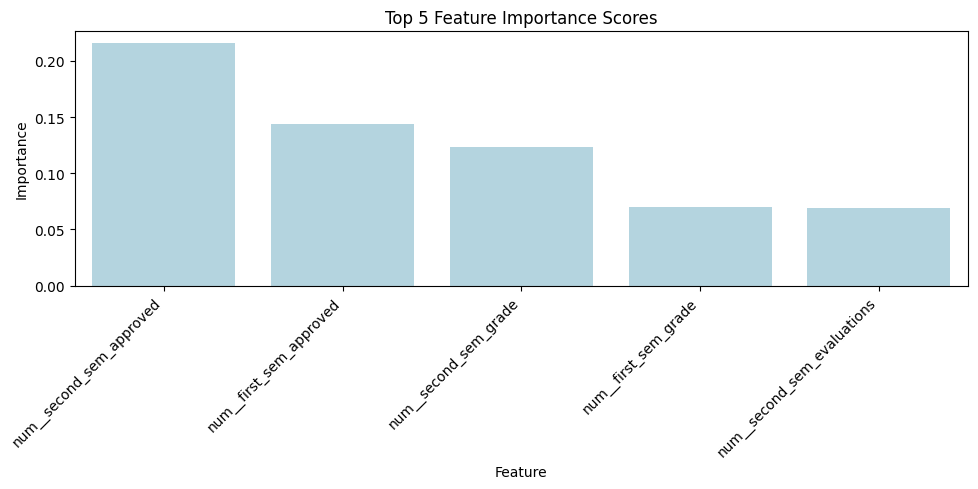

In [13]:
# Split features and target
X = s2.drop('target', axis=1)              # switch between s0, s1, s2
y = s2['target']

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['category']).columns.tolist()
num_cols = X.select_dtypes(include=['number']).columns.tolist()

# Preprocessor with one-hot encoding for categoricals
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42
)

# Build pipeline with SMOTE, Feature Selection, and Random Forest
pipe = ImbPipeline(steps=[
    ('pre', preprocessor),
    ('smote', SMOTE(random_state=42)),     # switch between SVM and SVMSMOTE
    ('select', SelectKBest(score_func=mutual_info_classif, k=5)),
    ('clf', RandomForestClassifier(random_state=42))
])

# define hyperparameter search
param_grid = {
    'select__k': [5, 10, 15],
    'smote__k_neighbors': [3, 5, 7],       # ignore for svmsmote
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [10, 20, None],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__class_weight': [None, 'balanced']
}

# Randomized Search with 5-fold CV
search = RandomizedSearchCV(pipe, param_distributions=param_grid, n_iter=20,
                            cv=5, scoring='f1_macro', n_jobs=-1,
                            return_train_score=True, random_state=42)
search.fit(X_train, y_train)

# Extract best training F1 score from CV
train_f1_scores = search.cv_results_['mean_train_score']
train_f1_std = search.cv_results_['std_train_score']
best_index = search.best_index_
best_train_f1 = train_f1_scores[best_index]
best_train_f1_std = train_f1_std[best_index]

# Evaluate best model
y_pred = search.predict(X_test)

print("Best Parameters:")
print(search.best_params_)

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Metrics
f1 = f1_score(y_test, y_pred, average='macro')
acc = balanced_accuracy_score(y_test, y_pred)
print(f"\nTrain Macro F1 (CV): {best_train_f1:.4f} ± {best_train_f1_std:.4f}")
print(f"Test Balanced Accuracy: {acc:.4f}, Test Macro F1: {f1:.4f}")

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2],
            yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()

# Extract selected features and importance scores
selected_mask = search.best_estimator_.named_steps['select'].get_support()
preprocessed_feature_names = search.best_estimator_.named_steps['pre'].get_feature_names_out()
selected_features = np.array(preprocessed_feature_names)[selected_mask]
importances = search.best_estimator_.named_steps['clf'].feature_importances_

# Sort and display top 15 features by importance
sorted_idx_all = np.argsort(importances)[::-1]
top_15_features = selected_features[sorted_idx_all][:15]
top_15_importances = importances[sorted_idx_all][:15]

print("\nTop 15 Features by Importance:")
for i, (feat, score) in enumerate(zip(top_15_features, top_15_importances), 1):
    print(f"{i}. {feat}: {score:.4f}")

# Plot top 5 feature importances (descending)
top_5_features = top_15_features[:5]
top_5_importances = top_15_importances[:5]

plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_features, y=top_5_importances, color='lightblue')
plt.title('Top 5 Feature Importance Scores')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Algorithm-level Approach**

- RUSBoost
- Easy Ensemble
- Balanced RF

### **RUSBoost**

Best Parameters:
{'select__k': 10, 'clf__sampling_strategy': 'auto', 'clf__n_estimators': 200, 'clf__learning_rate': 1.5}

Confusion Matrix:
[[ 87  20  35]
 [ 19 196   6]
 [ 17  39  24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.61      0.66       142
           1       0.77      0.89      0.82       221
           2       0.37      0.30      0.33        80

    accuracy                           0.69       443
   macro avg       0.62      0.60      0.60       443
weighted avg       0.68      0.69      0.68       443

Test Balanced Accuracy: 0.5999, Test Macro F1: 0.6037

Train Macro F1 (CV): 0.5871 ± 0.0347


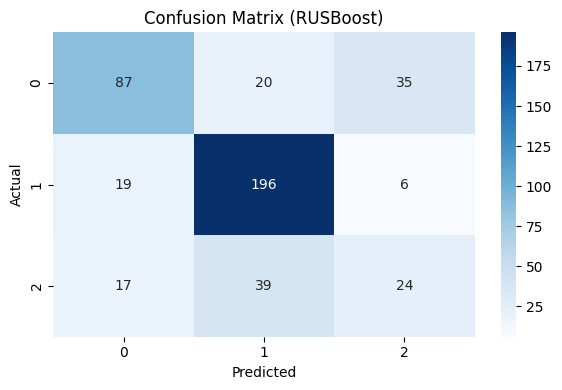


Top 15 Features by Importance:
1. num__gdp: 0.5686
2. num__first_sem_evaluations: 0.2445
3. num__admission_grade: 0.1795
4. num__prev_qualification_grade: 0.0074
5. num__first_sem_enrolled: 0.0000
6. num__first_sem_credited: 0.0000
7. num__unemployment_rate: 0.0000
8. num__inflation_rate: 0.0000
9. num__age_at_enrollment: 0.0000
10. num__application_order: 0.0000


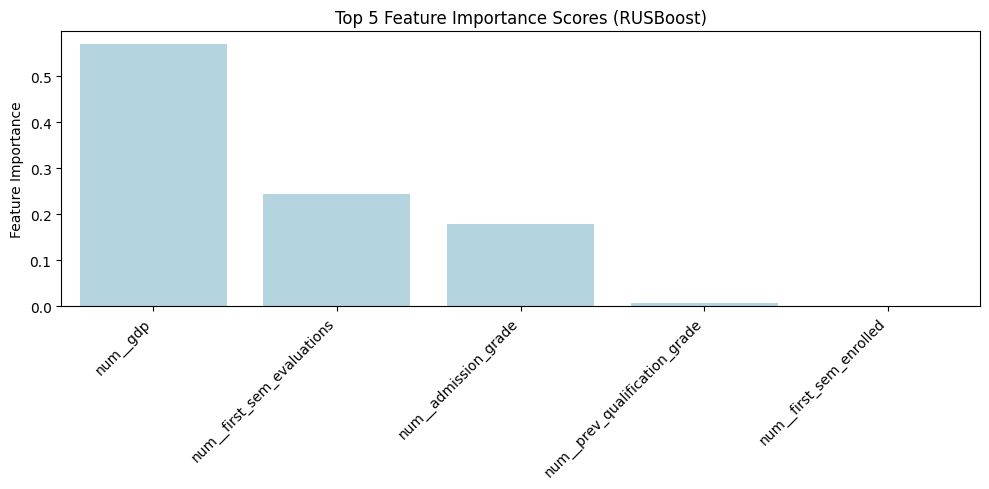

In [14]:
# Split features and target
X = s2.drop('target', axis=1)               # switch to s0, s1, and s2
y = s2['target']                            # switch to s0, s1, and s2

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['category']).columns.tolist()
num_cols = X.select_dtypes(include=['number']).columns.tolist()

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42
)

# RUSBoost Pipeline
pipe = ImbPipeline(steps=[
    ('pre', preprocessor),
    ('select', SelectKBest(score_func=mutual_info_classif)),
    ('clf', RUSBoostClassifier(random_state=42))
])

# Randomized Grid Search Params
param_grid = {
    'select__k': [10, 15, 20],
    'clf__n_estimators': [50, 100, 200],
    'clf__learning_rate': [0.5, 1.0, 1.5],
    'clf__sampling_strategy': ['auto', 'all']
}

grid = RandomizedSearchCV(pipe, param_distributions=param_grid,n_iter=10, cv=5,
                          return_train_score=True, scoring='f1_macro', n_jobs=-1,
                          random_state=42)

grid.fit(X_train, y_train)

# Evaluate
y_pred = grid.predict(X_test)
print("Best Parameters:")
print(grid.best_params_)

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

f1 = f1_score(y_test, y_pred, average='macro')
acc = balanced_accuracy_score(y_test, y_pred)
print(f"Test Balanced Accuracy: {acc:.4f}, Test Macro F1: {f1:.4f}")

# Train
train_f1_scores = grid.cv_results_['mean_train_score']
train_f1_std = grid.cv_results_['std_train_score']

print(f"\nTrain Macro F1 (CV): {np.max(train_f1_scores):.4f} ± {train_f1_std[np.argmax(train_f1_scores)]:.4f}")


# Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (RUSBoost)')
plt.tight_layout()
plt.show()

# Feature Importance (from final estimator)
final_model = grid.best_estimator_.named_steps['clf']
selected_k = grid.best_params_['select__k']
selected_features = grid.best_estimator_.named_steps['pre'].get_feature_names_out()
selected_features = selected_features[:selected_k]
importances = final_model.feature_importances_[:selected_k]

# Print Top 15 Features
sorted_idx_all = np.argsort(importances)[::-1]
top_15_features = selected_features[sorted_idx_all][:15]
top_15_importances = importances[sorted_idx_all][:15]

print("\nTop 15 Features by Importance:")
for i, (feat, score) in enumerate(zip(top_15_features, top_15_importances), 1):
    print(f"{i}. {feat}: {score:.4f}")

# Plot Top 5
top_5_features = top_15_features[:5]
top_5_importances = top_15_importances[:5]

plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_features, y=top_5_importances, color='lightblue')
plt.title('Top 5 Feature Importance Scores (RUSBoost)')
plt.ylabel('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###**Easy Ensemble**

Best Parameters:
{'select__k': 20, 'clf__sampling_strategy': 'auto', 'clf__n_estimators': 25}

Confusion Matrix:
[[ 90  12  40]
 [ 11 178  32]
 [ 13  23  44]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.63      0.70       142
           1       0.84      0.81      0.82       221
           2       0.38      0.55      0.45        80

    accuracy                           0.70       443
   macro avg       0.67      0.66      0.66       443
weighted avg       0.74      0.70      0.72       443

Test Balanced Accuracy: 0.6631, Test Macro F1: 0.6575

Train Macro F1 (CV): 0.6920 ± 0.0060


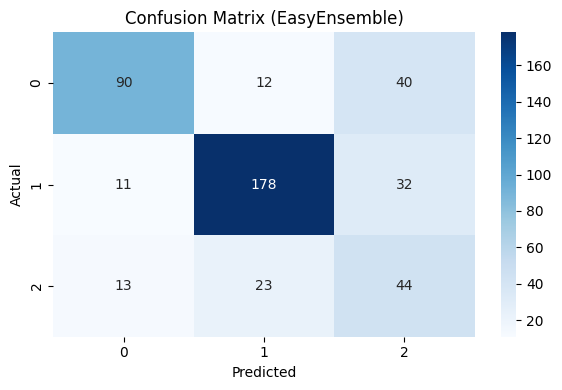


Top 15 Features by Importance:
1. num__second_sem_approved: 0.2887
2. cat__fees_up_to_date_1: 0.1132
3. cat__fees_up_to_date_0: 0.1011
4. num__second_sem_grade: 0.0815
5. num__first_sem_enrolled: 0.0745
6. num__second_sem_enrolled: 0.0739
7. num__first_sem_approved: 0.0547
8. num__age_at_enrollment: 0.0480
9. num__first_sem_evaluations: 0.0376
10. num__second_sem_evaluations: 0.0317
11. cat__scholarship_holder_0: 0.0182
12. num__admission_grade: 0.0174
13. cat__scholarship_holder_1: 0.0165
14. cat__debt_1: 0.0161
15. cat__debt_0: 0.0112


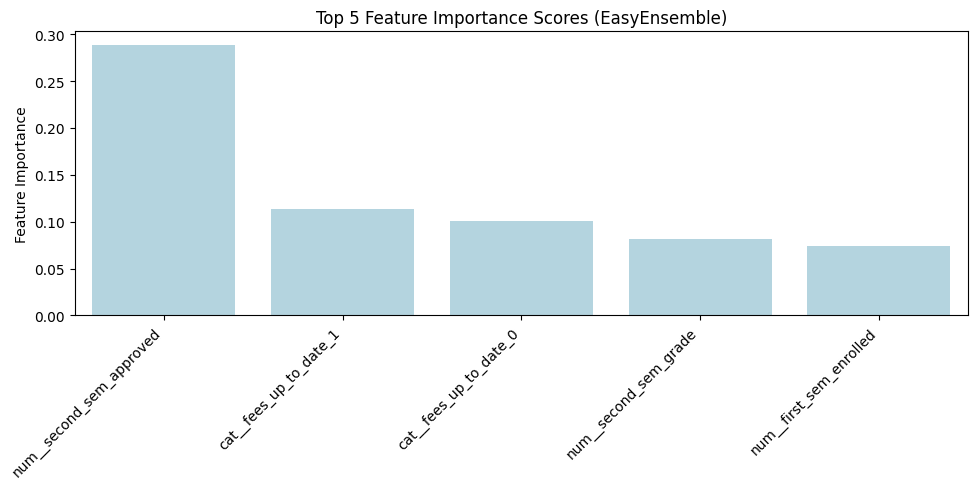

In [15]:
# Split features and target
X = s2.drop('target', axis=1)                 #s0, s1, and s2
y = s2['target']

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['category']).columns.tolist()
num_cols = X.select_dtypes(include=['number']).columns.tolist()

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42
)


# EE Pipeline
pipe = ImbPipeline(steps=[
    ('pre', preprocessor),
    ('select', SelectKBest(score_func=mutual_info_classif)),
    ('clf', EasyEnsembleClassifier(n_jobs=-1, random_state=42))
])

# define hyperparameter search space
param_grid = {
    'select__k': [10, 15, 20],
    'clf__n_estimators': [10, 25, 50],
    'clf__sampling_strategy': ['auto', 'not majority', 'all']
}

grid = RandomizedSearchCV(pipe, param_distributions=param_grid, n_iter=10,
                          return_train_score=True, cv=5, scoring='f1_macro',
                          n_jobs=-1, random_state=42)
grid.fit(X_train, y_train)

# Evaluation
y_pred = grid.predict(X_test)
print("Best Parameters:")
print(grid.best_params_)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

f1 = f1_score(y_test, y_pred, average='macro')
acc = balanced_accuracy_score(y_test, y_pred)
print(f"Test Balanced Accuracy: {acc:.4f}, Test Macro F1: {f1:.4f}")

cv_f1_scores = grid.cv_results_['mean_train_score']
cv_f1_std = grid.cv_results_['std_train_score']
print(f"\nTrain Macro F1 (CV): {np.max(cv_f1_scores):.4f} ± {cv_f1_std[np.argmax(cv_f1_scores)]:.4f}")

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (EasyEnsemble)')
plt.tight_layout()
plt.show()

# Feature Importance Extraction
feature_names = grid.best_estimator_.named_steps['pre'].get_feature_names_out()
mask = grid.best_estimator_.named_steps['select'].get_support()
selected_features = feature_names[mask]

# Get the classifier from the pipeline
final_model = grid.best_estimator_.named_steps['clf']

# Try to compute average feature importances over all base estimators.
importances_list = []
for sub_estimator in final_model.estimators_:
    # Some sub-estimators might be wrapped in a pipeline
    if hasattr(sub_estimator, 'steps'):
        base_est = sub_estimator.steps[-1][1]
    else:
        base_est = sub_estimator
    if hasattr(base_est, 'feature_importances_'):
        importances_list.append(base_est.feature_importances_)

if importances_list:
    avg_importances = np.mean(importances_list, axis=0)
    sorted_idx = np.argsort(avg_importances)[::-1]
    top_15_features = selected_features[sorted_idx][:15]
    top_15_importances = avg_importances[sorted_idx][:15]

    print("\nTop 15 Features by Importance:")
    for i, (feat, score) in enumerate(zip(top_15_features, top_15_importances), 1):
        print(f"{i}. {feat}: {score:.4f}")

    # Plot Top 5 Features
    top_5_features = top_15_features[:5]
    top_5_importances = top_15_importances[:5]

    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_5_features, y=top_5_importances, color='lightblue')
    plt.title('Top 5 Feature Importance Scores (EasyEnsemble)')
    plt.ylabel('Feature Importance')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("\nFeature importances are not available from the base estimator.")

### **Balanced RF**

Best Parameters:
{'select__k': 20, 'clf__n_estimators': 100, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 2, 'clf__max_features': 'log2', 'clf__max_depth': 20}

Confusion Matrix:
[[101  10  31]
 [  2 191  28]
 [ 10  26  44]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       142
           1       0.84      0.86      0.85       221
           2       0.43      0.55      0.48        80

    accuracy                           0.76       443
   macro avg       0.72      0.71      0.71       443
weighted avg       0.78      0.76      0.77       443

Test Balanced Accuracy: 0.7085, Test Macro F1: 0.7086

Train Macro F1 (CV): 0.9269 ± 0.0049


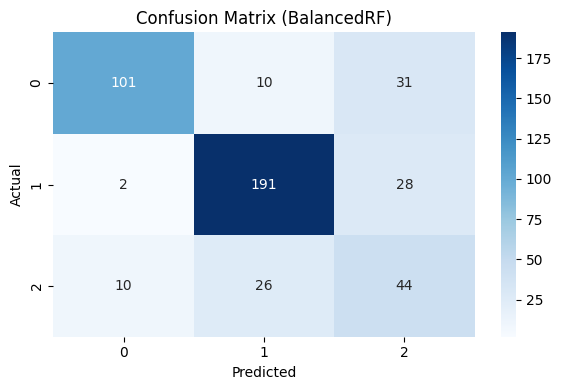


Top 15 Features by Importance:
1. num__second_sem_approved: 0.1440
2. num__second_sem_grade: 0.1290
3. num__first_sem_approved: 0.1094
4. num__first_sem_grade: 0.0881
5. num__admission_grade: 0.0792
6. num__prev_qualification_grade: 0.0654
7. num__second_sem_evaluations: 0.0636
8. num__age_at_enrollment: 0.0627
9. num__first_sem_evaluations: 0.0562
10. num__second_sem_enrolled: 0.0342
11. cat__fees_up_to_date_0: 0.0337
12. num__first_sem_enrolled: 0.0309
13. cat__fees_up_to_date_1: 0.0304
14. cat__scholarship_holder_0: 0.0139
15. cat__gender_0: 0.0120


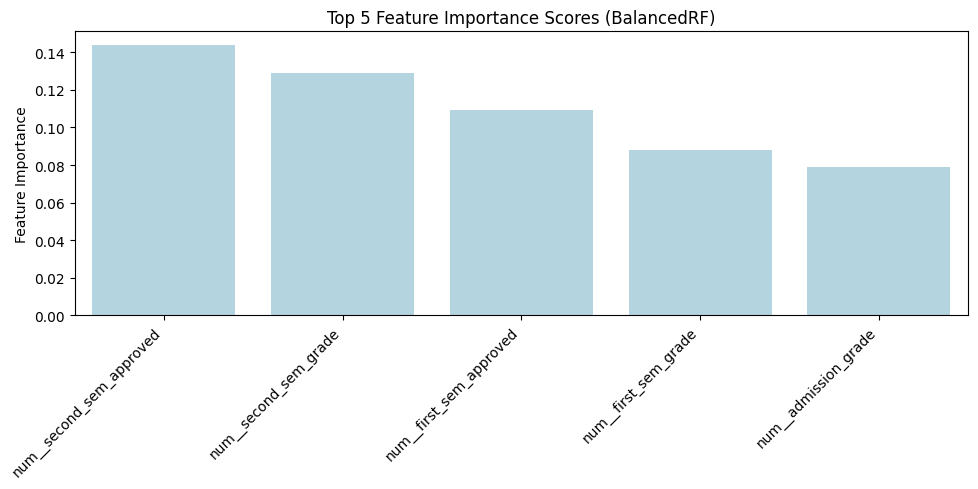

In [16]:
# split features and target
X = s2.drop('target', axis=1)
y = s2['target']

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['category']).columns.tolist()
num_cols = X.select_dtypes(include=['number']).columns.tolist()

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42
)

# BRF Pipeline
pipe = ImbPipeline(steps=[
    ('pre', preprocessor),
    ('select', SelectKBest(score_func=mutual_info_classif)),
    ('clf', BalancedRandomForestClassifier(random_state=42))
])

# Define a hyperparameter search grid
param_grid = {
    'select__k': [10, 15, 20],
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2],
    'clf__max_features': ['sqrt', 'log2', None]
}

grid = RandomizedSearchCV(pipe, param_distributions=param_grid, n_iter=10,
                          return_train_score=True, cv=5, scoring='f1_macro',
                          n_jobs=-1, random_state=42)
grid.fit(X_train, y_train)

# Evaluation
y_pred = grid.predict(X_test)
print("Best Parameters:")
print(grid.best_params_)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

f1 = f1_score(y_test, y_pred, average='macro')
acc = balanced_accuracy_score(y_test, y_pred)
print(f"Test Balanced Accuracy: {acc:.4f}, Test Macro F1: {f1:.4f}")

train_f1 = grid.cv_results_['mean_train_score']
train_f1_std = grid.cv_results_['std_train_score']
print(f"\nTrain Macro F1 (CV): {np.max(train_f1):.4f} ± {train_f1_std[np.argmax(train_f1)]:.4f}")

# Confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (BalancedRF)')
plt.tight_layout()
plt.show()

# Extract feature names after preprocessing and feature selection
feature_names = grid.best_estimator_.named_steps['pre'].get_feature_names_out()
mask = grid.best_estimator_.named_steps['select'].get_support()
selected_features = feature_names[mask]

# Access feature importances from the BalancedRF
final_model = grid.best_estimator_.named_steps['clf']
if hasattr(final_model, 'feature_importances_'):
    importances = final_model.feature_importances_
    sorted_idx = np.argsort(importances)[::-1]
    top_15_features = selected_features[sorted_idx][:15]
    top_15_importances = importances[sorted_idx][:15]
    print("\nTop 15 Features by Importance:")
    for i, (feat, score) in enumerate(zip(top_15_features, top_15_importances), 1):
        print(f"{i}. {feat}: {score:.4f}")

    # Plot Top 5 Features
    top_5_features = top_15_features[:5]
    top_5_importances = top_15_importances[:5]
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_5_features, y=top_5_importances, color='lightblue')
    plt.title('Top 5 Feature Importance Scores (BalancedRF)')
    plt.ylabel('Feature Importance')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Feature importances are not available.")